In [1]:
import os
import shutil

working_dir = "/kaggle/working"

# List all items in the working directory
for item in os.listdir(working_dir):
    item_path = os.path.join(working_dir, item)
    try:
        # Remove directories recursively
        if os.path.isdir(item_path):
            shutil.rmtree(item_path)
            print(f"Deleted directory: {item_path}")
        # Remove files
        else:
            os.remove(item_path)
            print(f"Deleted file: {item_path}")
    except Exception as e:
        print(f"Error deleting {item_path}: {e}")

Deleted directory: /kaggle/working/.virtual_documents


In [2]:
!git clone https://github.com/ibaiGorordo/Ultrafast-Lane-Detection-Inference-Pytorch-.git

Cloning into 'Ultrafast-Lane-Detection-Inference-Pytorch-'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 63 (delta 24), reused 39 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 10.88 MiB | 33.54 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [3]:
!pip install deep-sort-realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 68.9 MB/s eta 0:00:0000:0100:01


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 26.3 MB/s eta 0:00:0000:01


In [5]:
!pip install torchreid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torchreid: filename=torchreid-0.2.5-py3-none-any.whl size=144325 sha256=c1e86a05fe2d3d045935054db24edbb5a4c7bc6bb68ce2b58bb9a7bd31bb2ce6
  Stored in directory: /root/.cache/pip/wheels/bb/2d/36/816a48465cefd3e58be0317648a4c52ce39ae817f935212099
Successfully built torchreid


In [6]:
!cat /kaggle/working/Ultrafast-Lane-Detection-Inference-Pytorch-/ultrafastLaneDetector/ultrafastLaneDetector.py

import cv2
import torch
import scipy.special
import numpy as np
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from enum import Enum
from scipy.spatial.distance import cdist

from ultrafastLaneDetector.model import parsingNet

lane_colors = [(0,0,255),(0,255,0),(255,0,0),(0,255,255)]

tusimple_row_anchor = [ 64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108, 112,
			116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164,
			168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216,
			220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268,
			272, 276, 280, 284]
culane_row_anchor = [121, 131, 141, 150, 160, 170, 180, 189, 199, 209, 219, 228, 238, 248, 258, 267, 277, 287]


class ModelType(Enum):
	TUSIMPLE = 0
	CULANE = 1

class ModelConfig():

	def __init__(self, model_type):

		if model_type == ModelType.TUSIMPLE:
			self.init_tusimple_config()
		else:
			self.init_culane_config()

	def init_tusimple_config(self):
	

In [9]:
enhanced_code = '''
# --- FCWS Safe Distance Parameters ---
brake_buffer_by_class = {
    "car": 10,
    "truck": 20,
    "bus": 18,
    "motorcycle": 8,
    "person": 8,
    "unknown": 12
}
reaction_time = 1.5  # in seconds

def compute_safe_distance(object_class, current_speed_kmph):
    speed_mps = current_speed_kmph / 3.6
    buffer = brake_buffer_by_class.get(object_class.lower(), brake_buffer_by_class["unknown"])
    return round((reaction_time * speed_mps) + buffer, 2)


import cv2
import torch
import time
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from enum import Enum
import scipy.special
from scipy.interpolate import UnivariateSpline
from collections import deque 
from ultrafastLaneDetector.model import parsingNet

lane_colors = [(0,0,255), (0,255,0), (255,0,0), (0,255,255)]

tusimple_row_anchor = [64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112,
            116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164,
            168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216,
            220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268,
            272, 276, 280, 284]
culane_row_anchor = [121, 131, 141, 150, 160, 170, 180, 189, 199, 209, 219, 228, 238, 248, 258, 267, 277, 287]

class ModelType(Enum):
    TUSIMPLE = 0
    CULANE = 1

class ModelConfig():
    def __init__(self, model_type):
        if model_type == ModelType.TUSIMPLE:
            self.init_tusimple_config()
        else:
            self.init_culane_config()

    def init_tusimple_config(self):
        self.img_w = 1280
        self.img_h = 720
        self.row_anchor = tusimple_row_anchor
        self.griding_num = 100
        self.cls_num_per_lane = 56

    def init_culane_config(self):
        self.img_w = 1640
        self.img_h = 590
        self.row_anchor = culane_row_anchor
        self.griding_num = 200
        self.cls_num_per_lane = 18

class UltrafastLaneDetector():
    def __init__(self, model_path, model_type=ModelType.TUSIMPLE, use_gpu=False):
        self.use_gpu = use_gpu
        self.cfg = ModelConfig(model_type)
        self.model = self.initialize_model(model_path, self.cfg, use_gpu)
        self.img_transform = self.initialize_image_transform()
        self.lane_history = deque(maxlen=15)
        self.load_ui_elements()
        self.detected_objects = []  # Store detected objects for FCWS

    def load_ui_elements(self):
        """ Load UI icons for Lane Keeping, Lane Change Assist, and Forward Collision Warning System. """
        self.ui_icons = {
            "right_turn": cv2.imread("/kaggle/input/warning-departure/right_turn.png", cv2.IMREAD_UNCHANGED),
            "left_turn": cv2.imread("/kaggle/input/warning-departure/left_turn.png", cv2.IMREAD_UNCHANGED),
            "straight": cv2.imread("/kaggle/input/warning-departure/straight.png", cv2.IMREAD_UNCHANGED),
            "fcws_warning": cv2.imread("/kaggle/input/warning-departure/FCWS-warning.png", cv2.IMREAD_UNCHANGED),
            "fcws_prompt": cv2.imread("/kaggle/input/warning-departure/FCWS-prompt.png", cv2.IMREAD_UNCHANGED),
            "fcws_normal": cv2.imread("/kaggle/input/warning-departure/FCWS-normal.png", cv2.IMREAD_UNCHANGED),
            "lta_left": cv2.imread("/kaggle/input/warning-departure/LTA-left_lanes.png", cv2.IMREAD_UNCHANGED),
            "lta_right": cv2.imread("/kaggle/input/warning-departure/LTA-right_lanes.png", cv2.IMREAD_UNCHANGED),
            "warning": cv2.imread("/kaggle/input/warning-departure/warn.png", cv2.IMREAD_UNCHANGED),
        }

    @staticmethod
    def initialize_model(model_path, cfg, use_gpu):
        net = parsingNet(pretrained=False, backbone='18', cls_dim=(cfg.griding_num+1, cfg.cls_num_per_lane, 4), use_aux=False)
        map_loc = 'cuda' if use_gpu and torch.cuda.is_available() else 'cpu'
        state_dict = torch.load(model_path, map_location=map_loc)['model']
        compatible_state_dict = {k[7:] if 'module.' in k else k: v for k, v in state_dict.items()}
        net.load_state_dict(compatible_state_dict, strict=False)
        net.eval()
        if use_gpu and not torch.backends.mps.is_built():
            net = net.cuda()
        return net
        
    @staticmethod    
    def initialize_image_transform():
        return transforms.Compose([
            transforms.Resize((288, 800)),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ])

    def overlay_ui(self, frame, fps=0.0):
        """
        Improved overlay with correctly aligned text and icons.
        """
        h, w, _ = frame.shape
    
        # LKA Status
        offset = self.compute_lane_offset()
        if abs(offset) < 20:
            lka_icon = self.ui_icons["straight"]
            lka_text_lines = ["LDWS: Good Lane Keeping", "LKAS: Keep Straight Ahead"]
            lka_color = (0, 255, 0)
        elif offset > 20:
            lka_icon = self.ui_icons["right_turn"]
            lka_text_lines = ["⚠ Lane Departure Right"]
            lka_color = (0, 0, 255)
        else:
            lka_icon = self.ui_icons["left_turn"]
            lka_text_lines = ["⚠ Lane Departure Left"]
            lka_color = (0, 0, 255)

        # FCWS
        fcws_icon = self.ui_icons["fcws_normal"]
        fcws_text = "FCWS: Normal Risk"
        if self.detect_collision_risk(current_speed_kmph=60):  # Or any dynamic value if you estimate speed
            fcws_icon = self.ui_icons["fcws_warning"]
            fcws_text = "⚠ FCWS: High Risk"
    
        # LCA
        if self.lanes_detected[0]:
            lca_icon = self.ui_icons["lta_left"]
        elif self.lanes_detected[3]:
            lca_icon = self.ui_icons["lta_right"]
        else:
            lca_icon = self.ui_icons["warning"]
    
        # === TOP LEFT: LKA BOX ===
        cv2.rectangle(frame, (30, 30), (280, 170), (0, 0, 0), 2)
        frame = self.overlay_icon(frame, lka_icon, (100, 50))
        for i, line in enumerate(lka_text_lines):
            cv2.putText(frame, line, (50, 155 + i*30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, lka_color, 2)
    
        # === TOP RIGHT: FCWS BOX ===
        cv2.rectangle(frame, (w - 250, 30), (w - 30, 240), (0, 0, 0), 2)
        frame = self.overlay_icon(frame, fcws_icon, (w - 225, 40))
        cv2.putText(frame, fcws_text, (w - 225, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
        # === LCA Icon (Below LKA) ===
        frame = self.overlay_icon(frame, lca_icon, (50, 180))
    
        # === Bottom Left: FPS ===
        cv2.putText(frame, f"FPS: {fps:.2f}", (60, h - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    
        return frame

    def overlay_icon(self, frame, icon, position):
        """
        Overlay an icon with alpha transparency at the given position.
        """
        if icon is None:
            return frame  # Skip if image is not loaded
    
        h, w, _ = icon.shape
        x, y = position
    
        # Ensure it fits in the frame
        if y + h > frame.shape[0] or x + w > frame.shape[1]:
            return frame
    
        # Extract the alpha channel
        alpha_channel = icon[:, :, 3] / 255.0
        for c in range(3):  # Apply for each RGB channel
            frame[y:y+h, x:x+w, c] = (1 - alpha_channel) * frame[y:y+h, x:x+w, c] + alpha_channel * icon[:, :, c]
        
        return frame

    def prepare_input(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img)
        input_img = self.img_transform(img_pil)
        input_tensor = input_img[None, ...]
        if self.use_gpu and not torch.backends.mps.is_built():
            input_tensor = input_tensor.cuda()
        return input_tensor

    def inference(self, input_tensor):
        with torch.no_grad():
            return self.model(input_tensor)

    def process_output(self, output):
        processed = output[0].data.cpu().numpy()
        processed = processed[:, ::-1, :]
        prob = scipy.special.softmax(processed[:-1, :, :], axis=0)
        idx = np.arange(self.cfg.griding_num) + 1
        loc = np.sum(prob * idx.reshape(-1, 1, 1), axis=0)
        processed = np.argmax(processed, axis=0)
        loc[processed == self.cfg.griding_num] = 0
        processed = loc
    
        col_sample = np.linspace(0, 800 - 1, self.cfg.griding_num)
        col_sample_w = col_sample[1] - col_sample[0]
    
        lanes_points, lanes_detected = [], []
        for lane_num in range(processed.shape[1]):
            points = []
            valid_points = processed[:, lane_num] != 0
    
            # ✅ Stricter threshold to reduce false lanes
            if np.sum(valid_points) >= 6:  # You had >2 before — this improves robustness
                lanes_detected.append(True)
                for i in range(processed.shape[0]):
                    if processed[i, lane_num] > 0:
                        x = int(processed[i, lane_num] * col_sample_w * self.cfg.img_w / 800) - 1
                        y = int(self.cfg.img_h * (self.cfg.row_anchor[self.cfg.cls_num_per_lane - 1 - i] / 288)) - 1
                        points.append([x, y])
            else:
                lanes_detected.append(False)
            lanes_points.append(points)
    
        # ✅ Apply temporal smoothing
        self.lane_history.append(lanes_points)
        smoothed_lanes = self.smooth_lanes()
    
        return smoothed_lanes, lanes_detected

    def compute_lane_offset(self):
        """
        Calculate how far the vehicle is from the lane center.
        A positive value means deviating right, negative means deviating left.
        """
        if self.lanes_detected[1] and self.lanes_detected[2]:  # Middle lanes detected
            left_lane = np.array(self.lanes_points[1])
            right_lane = np.array(self.lanes_points[2])
    
            # Ensure equal length by interpolating shorter lane
            min_len = min(len(left_lane), len(right_lane))
            left_lane, right_lane = left_lane[:min_len], right_lane[:min_len]
    
            # Compute lane center
            lane_center_x = np.mean((left_lane[:, 0] + right_lane[:, 0]) / 2)
            car_position_x = self.cfg.img_w // 2  # Assume car is at image center
    
            # Compute offset (negative = left, positive = right)
            offset = car_position_x - lane_center_x
            return offset
        return 0  # Default, if lanes not detected

    def get_lka_status(self):
        """
        Determines if the vehicle is centered in the lane or deviating.
        """
        offset = self.compute_lane_offset()
    
        if abs(offset) < 20:  # Small deviation threshold
            return "LDWS: Good Lane Keeping", (0, 255, 0)  # Green safe zone
        elif offset > 20:
            return "⚠ Lane Departure Right", (0, 0, 255)  # Red warning
        else:
            return "⚠ Lane Departure Left", (0, 0, 255)

    def get_lca_status(self):
        """
        Determines if the driver can change lanes.
        """
        suggestions = []
        
        if self.lanes_detected[0]:  # Left lane detected
            suggestions.append("✅ Left Lane Available")
        if self.lanes_detected[3]:  # Right lane detected
            suggestions.append("✅ Right Lane Available")
    
        if not suggestions:
            suggestions.append("❌ No Safe Lane Change")
    
        return suggestions

    def detect_collision_risk(self, current_speed_kmph=60):
        """
        Smarter FCWS using class-aware safe distance.
        Only considers forward objects in ego lane.
        """
        ego_lane = self.get_ego_lane_index()
        for obj in self.detected_objects:
            if obj.get("lane_idx") == ego_lane:
                obj_type = obj["type"]
                dist = obj["distance"]
                safe_dist = compute_safe_distance(obj_type, current_speed_kmph)
                if dist < safe_dist:
                    return True
        return False

    def get_ego_lane_index(self):
        """
        Returns the index of the ego lane (center lane).
        """
        img_center = self.cfg.img_w // 2
        lane_centers = []
        for i, lane in enumerate(self.lanes_points[:4]):
            if len(lane) > 0:
                avg_x = np.mean([pt[0] for pt in lane])
                lane_centers.append((i, avg_x))
        sorted_lanes = sorted(lane_centers, key=lambda x: abs(x[1] - img_center))
        return sorted_lanes[0][0] if sorted_lanes else 1  # fallback to lane 1
    
    def detect_lanes(self, image, draw_points=True):
        """
        Detects lanes, applies lane smoothing, and overlays LKA/LCA and FCWS UI elements.
        Automatically resizes input to model resolution and restores it back.
        Also computes and displays real-time FPS.
        """
        # Initialize prev_time if not present
        if not hasattr(self, 'prev_time'):
            self.prev_time = time.time()
            fps = 0.0  # Skip FPS calculation for the first frame
        else:
            current_time = time.time()
            delta = current_time - self.prev_time
            fps = 1.0 / delta if delta > 0.001 else 0.0  # Prevent division by very small number
            self.prev_time = current_time
    
        # Resize image to model input size
        original_shape = image.shape[1], image.shape[0]  # (w, h)
        resized = cv2.resize(image, (self.cfg.img_w, self.cfg.img_h), interpolation=cv2.INTER_AREA)
    
        input_tensor = self.prepare_input(resized)
        output = self.inference(input_tensor)
        self.lanes_points, self.lanes_detected = self.process_output(output)
    
        # Draw lanes
        vis = self.draw_lanes(resized, self.lanes_points, self.lanes_detected, self.cfg, draw_points)
    
        # Overlay UI including FPS
        vis = self.overlay_ui(vis, fps)
    
        # Resize back to original size
        vis = cv2.resize(vis, original_shape, interpolation=cv2.INTER_LINEAR)
        return vis, fps
    
    def smooth_lanes(self, alpha=0.8):
        if len(self.lane_history) < 2:
            return self.lane_history[-1]
    
        smoothed_lanes = []
        for i in range(len(self.lane_history[-1])):
            weighted = np.array(self.lane_history[-1][i], dtype=np.float32)
            count = 1
    
            for past_frame in list(self.lane_history)[-2::-1]:
                if i >= len(past_frame):
                    continue
                prev = np.array(past_frame[i], dtype=np.float32)
                if len(prev) != len(weighted):
                    continue
                weighted = (alpha * weighted + (1 - alpha) * prev)
                count += 1
                if count >= 3:
                    break
    
            smoothed_lanes.append(weighted.astype(int).tolist())
        return smoothed_lanes

    def draw_lanes(self, input_img, lanes_points, lanes_detected, cfg, draw_points=True):
        vis = input_img.copy()
        lane_mask = vis.copy()
        
        detected_idxs = [i for i, d in enumerate(lanes_detected) if d]
        if len(detected_idxs) < 2:
            return vis
    
        # === 1. Compute average x for all detected lanes ===
        avg_xs = []
        for idx in detected_idxs:
            xs = [pt[0] for pt in lanes_points[idx]]
            avg_x = np.mean(xs) if xs else float('inf')
            avg_xs.append((idx, avg_x))
    
        # === 2. Sort lanes by avg x (from left to right) ===
        sorted_lanes = sorted(avg_xs, key=lambda x: x[1])
        sorted_idxs = [idx for idx, _ in sorted_lanes]
    
        # === 3. Target lane: Rightmost → largest avg x ===
        target_idx = sorted_idxs[-1]  # rightmost
        target_pos = sorted_idxs.index(target_idx)
    
        if target_pos == 0:
            target_pair = (sorted_idxs[0], sorted_idxs[1])
        else:
            target_pair = (sorted_idxs[target_pos - 1], sorted_idxs[target_pos])

        # === 4. Ego lane: Find the pair that surrounds image center ===
        img_center = vis.shape[1] // 2
        min_gap = float('inf')
        ego_pair = None
    
        for i in range(len(sorted_idxs) - 1):
            x1 = np.mean([pt[0] for pt in lanes_points[sorted_idxs[i]]])
            x2 = np.mean([pt[0] for pt in lanes_points[sorted_idxs[i + 1]]])
            if x1 < img_center < x2:
                gap = abs((x1 + x2) / 2 - img_center)
                if gap < min_gap:
                    min_gap = gap
                    ego_pair = (sorted_idxs[i], sorted_idxs[i + 1])
    
        # fallback: if nothing surrounds center, pick mid-pair
        if ego_pair is None:
            mid = len(sorted_idxs) // 2
            ego_pair = (sorted_idxs[mid - 1], sorted_idxs[mid])
    
        # === 5. Color assignment ===
        is_same = (set(ego_pair) == set(target_pair))
        
        # Ego lane (🟡 or 🟢)
        ego_color = (0, 255, 0) if is_same else (255, 191, 0)
        cv2.fillPoly(
            lane_mask,
            [np.vstack((lanes_points[ego_pair[0]], np.flipud(lanes_points[ego_pair[1]])))],
            color=ego_color
        )

        # Target lane (🔴 if not ego)
        if not is_same:
            cv2.fillPoly(
                lane_mask,
                [np.vstack((lanes_points[target_pair[0]], np.flipud(lanes_points[target_pair[1]])))],
                color=(0, 0, 255)
            )
    
        # === 6. Overlay blended mask ===
        vis = cv2.addWeighted(vis, 0.7, lane_mask, 0.3, 0)
    
        # === 7. Draw lane points ===
        if draw_points:
            for i, lane in enumerate(lanes_points):
                smoothed = self.fit_lane_curve(lane)
                for pt in smoothed:
                    cv2.circle(vis, tuple(pt), 3, lane_colors[i % len(lane_colors)], -1)
    
        return vis
            
    def fit_lane_curve(self, lane_points):
        """
        Smooth lane points using a Univariate Spline for better curve adaptation.
        """
        if len(lane_points) < 5:  # Avoid error if too few points
            return lane_points
        
        lane_points = np.array(lane_points)
        x, y = lane_points[:, 0], lane_points[:, 1]
    
        try:
            spline = UnivariateSpline(y, x, k=2, s=3)
            y_new = np.linspace(y.min(), y.max(), 100)
            x_new = spline(y_new)
            return list(zip(x_new.astype(int), y_new.astype(int)))
        except:
            return lane_points  # Return original points if spline fails

    def suggest_lane_change(self):
        """
        Suggest if the driver can safely change lanes.
        """
        suggestions = []
        lane_width_threshold = 3.5  # Example lane width in meters

        if self.lanes_detected[0]:
            suggestions.append("✅ Left lane available for a lane change.")
        if self.lanes_detected[3]:
            suggestions.append("✅ Right lane available for a lane change.")

        return suggestions

    def get_center_line(self):
        """
        Compute the centerline between left and right lanes.
        """
        if self.lanes_detected[1] and self.lanes_detected[2]:
            l, r = self.lanes_points[1], self.lanes_points[2]
            if len(l) == len(r):
                return ((np.array(l) + np.array(r)) // 2).tolist()
        return []
'''

# Overwrite the file
with open("/kaggle/working/Ultrafast-Lane-Detection-Inference-Pytorch-/ultrafastLaneDetector/ultrafastLaneDetector.py", "w") as f:
    f.write(enhanced_code)

print("✅ ultrafastLaneDetector.py has been updated with enhancements.")

✅ ultrafastLaneDetector.py has been updated with enhancements.


In [ ]:
import os
os._exit(00)  # Forces full restart

In [2]:
import sys
import os

# Define the repository path
repo_path = "/kaggle/working/Ultrafast-Lane-Detection-Inference-Pytorch-"

# Add the repo path to sys.path
sys.path.append(repo_path)

# Verify the module path
print("Repo path added:", repo_path)

Repo path added: /kaggle/working/Ultrafast-Lane-Detection-Inference-Pytorch-


In [3]:
import os
import numpy as np
import torch
import torch.nn as nn
import cv2
from ultrafastLaneDetector.ultrafastLaneDetector import UltrafastLaneDetector, ModelType
import matplotlib.pyplot as plt
from collections import deque
from ultralytics import YOLO  
from deep_sort_realtime.deepsort_tracker import DeepSort

In [4]:
# ✅ Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Load model and move to GPU if available
model_path = "/kaggle/input/culane-18/culane_18.pth"
lane_detector = UltrafastLaneDetector(model_path, model_type=ModelType.CULANE, use_gpu=(device.type == "cuda"))
lane_detector.model.to(device)
print("✅ Model loaded successfully!")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Model loaded successfully!


In [5]:
yolo_model = YOLO("/kaggle/input/yolo11l/yolo11l.pt")

In [6]:
deep_sort = DeepSort(embedder="mobilenet", max_age=30, nms_max_overlap=0.5)

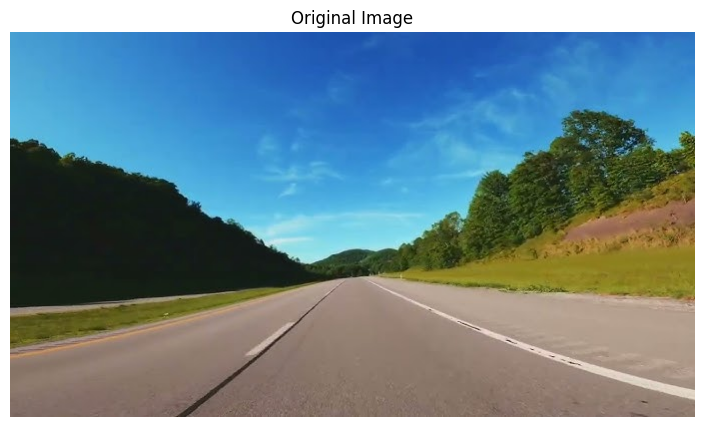

In [7]:
# Load an image using OpenCV
image_path = "/kaggle/input/road-image/hq720.jpg"  
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the original image
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

➡️ Lane Metadata: [False, True, True, False]
➡️ lane_img type: <class 'numpy.ndarray'>
➡️ lane_img shape: (386, 686, 3)


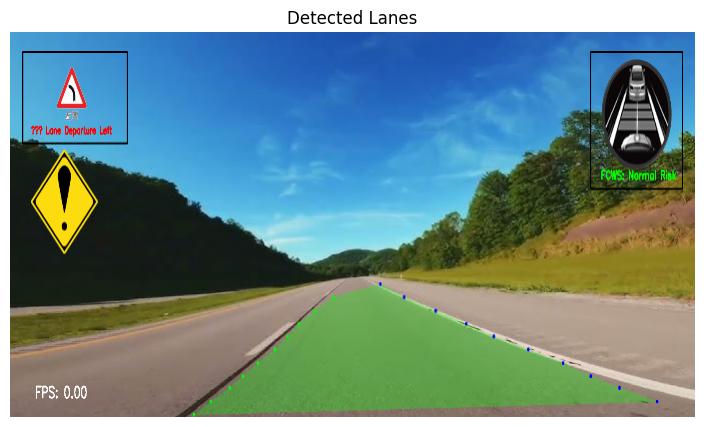

In [8]:
# ✅ Check if the image exists
if not os.path.exists(image_path):
    print(f"❌ Error: Image not found at {image_path}")
else:
    # ✅ Load the Image
    image = cv2.imread(image_path)

    # ✅ Ensure Image is Loaded
    if image is None:
        print("❌ Error: Failed to load the image. Check file format or path.")
    else:
        # ✅ Perform Lane Detection (Only unpack the image output)
        lane_img, fps = lane_detector.detect_lanes(image)

        # ✅ Show metadata for debug (if available)
        # If metadata is available, print it; otherwise, print None
        print("➡️ Lane Metadata:", lane_detector.lanes_detected)  # Adjust based on your metadata

        # ✅ Check if lane_img is valid before further processing
        if lane_img is None:
            print("❌ Error: Lane detection failed, lane_img is None.")
        else:
            # ✅ Print type and shape of lane_img for debugging
            print("➡️ lane_img type:", type(lane_img))
            if isinstance(lane_img, np.ndarray):
                print("➡️ lane_img shape:", lane_img.shape)
            
            # ✅ Convert to RGB for Display
            try:
                lane_img = cv2.cvtColor(lane_img, cv2.COLOR_BGR2RGB)

                # ✅ Display the Detected Lanes
                plt.figure(figsize=(10, 5))
                plt.imshow(lane_img)
                plt.axis("off")
                plt.title("Detected Lanes")
                plt.show()
            except Exception as e:
                print(f"❌ Error during cvtColor: {e}")

In [ ]:
input_video_path = "/kaggle/input/car-video/videoplayback.mp4"
output_video_path = "/kaggle/working/output_video.mp4"

cap = cv2.VideoCapture(input_video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

if not cap.isOpened():
    print(f"❌ Cannot open video: {input_video_path}")
    exit()

print("✅ Processing video...")

CLASS_COLORS = {
    0: (0, 0, 255),      # person
    1: (0, 255, 0),      # bicycle
    2: (255, 255, 255),  # car
    3: (255, 255, 0),    # motorcycle
    5: (255, 0, 255),    # bus
    7: (0, 255, 255),    # truck
    9: (0, 255, 0)       # traffic light
}
CLASS_NAMES = yolo_model.model.names
SHOW_INFO_CLASSES = {0, 1, 2, 3, 5, 7}

# Distance Estimator
def estimate_distance(bbox, focal_length=720, default_height=1.6):
    x, y, w, h = bbox
    if h <= 0:
        return 999
    return round((default_height * focal_length) / h, 1)

# ✅ STEP 4: Lane Assignment
# Lane 1 = rightmost
def assign_lane(x_center, lane_boundaries):
    for i in range(len(lane_boundaries) - 1):
        if lane_boundaries[i + 1] <= x_center <= lane_boundaries[i]:
            return str(i + 1)
    return "_"

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    #  Detect lanes (UFLD)
    with torch.no_grad():
        frame_with_lanes, fps = lane_detector.detect_lanes(frame)

    if frame_with_lanes is None:
        continue

    #  Extract lane centers
    all_lanes = lane_detector.lanes_points[:4]
    valid_lanes = [lane for lane in all_lanes if len(lane) > 0]

    if len(valid_lanes) >= 2:
        lane_xs = sorted([np.median([pt[0] for pt in lane]) for lane in valid_lanes])[::-1]
    else:
        lane_xs = []

    # YOLOv11 Detection
    yolo_results = yolo_model(frame)[0]
    detections = []
    tracked_yolo_boxes = []  # To store matched YOLO boxes by track ID

    for det in yolo_results.boxes:
        x1, y1, x2, y2 = map(int, det.xyxy[0].tolist())
        conf = float(det.conf[0])
        cls_id = int(det.cls[0])
        if conf < 0.6 or cls_id not in CLASS_COLORS:
            continue
        w, h = x2 - x1, y2 - y1
        detections.append(([x1, y1, w, h], conf, cls_id))
        tracked_yolo_boxes.append({
            "bbox": [x1, y1, w, h],
            "cls_id": cls_id,
            "center": (x1 + w // 2, y1 + h // 2)
        })


    tracks = deep_sort.update_tracks(detections, frame=frame)

    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        x1, y1, x2, y2 = track.to_ltrb()
        w, h = x2 - x1, y2 - y1
        cx = int(x1 + w / 2)

        # Match track to YOLO box (by center proximity)
        matched = None
        for yolo_box in tracked_yolo_boxes:
            yolo_cx, yolo_cy = yolo_box["center"]
            if abs(cx - yolo_cx) < 30:  # simple proximity check
                matched = yolo_box
                break

        if not matched:
            continue

        x, y, w, h = matched["bbox"]
        cls_id = matched["cls_id"]
        if cls_id not in SHOW_INFO_CLASSES:
            continue

        distance = estimate_distance([x, y, w, h])
        lane_number = assign_lane(x + w // 2, lane_xs)
        color = CLASS_COLORS[cls_id]

        # Draw box and labels
        cv2.rectangle(frame_with_lanes, (x, y), (x + w, y + h), color, 2)
        cv2.putText(frame_with_lanes, f"{distance:.1f}m", (x + 5, y + h - 12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
        lane_text = f"Lane {lane_number}"
        text_size = cv2.getTextSize(lane_text, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]
        cv2.putText(frame_with_lanes, lane_text, (x + w - text_size[0] - 5, y + h - 12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    if frame_with_lanes.shape[:2] != (frame_height, frame_width):
        frame_with_lanes = cv2.resize(frame_with_lanes, (frame_width, frame_height))

    out.write(frame_with_lanes)

cap.release()
out.release()
cv2.destroyAllWindows()
print(f"✅ Processed video saved to: {output_video_path}")

✅ Processing video...

0: 384x640 (no detections), 19.1ms
Speed: 1.4ms preprocess, 19.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 18.2ms
Speed: 1.5ms preprocess, 18.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 18.2ms
Speed: 1.6ms preprocess, 18.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 17.9ms
Speed: 1.3ms preprocess, 17.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 18.0ms
Speed: 1.5ms preprocess, 18.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 17.8ms
Speed: 1.4ms preprocess, 17.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 20.4ms
Speed: 1.2ms preprocess, 20.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.6ms
Speed: 1.3m